In [1]:
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from io import BytesIO
from __future__ import division

# https://beckernick.github.io/convolutions/

In [2]:
response = requests.get('http://vignette2.wikia.nocookie.net/grayscale/images/4/47/Lion.png/revision/latest?cb=20130926182831')
lion_array = np.array(Image.open(BytesIO(response.content)))

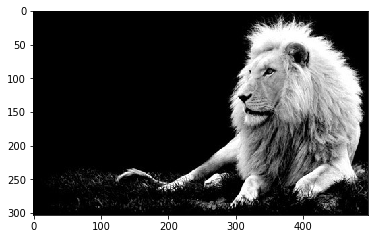

In [3]:
plt.imshow(lion_array)

In [4]:
print(lion_array.shape)
print(np.array_equal(lion_array[:, :, 0], lion_array[:, :, 1]))
print(np.array_equal(lion_array[:, :, 1], lion_array[:, :, 2]))

(303, 497, 3)
True
True


In [5]:
lion_array = lion_array[:, :, 0]

In [6]:
# lion_array[:, :]
lion_array[:200, :400]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  2,   2,   1, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ..., 
       [  0,   1,   0, ...,   5,  86,  97],
       [  0,   1,   0, ...,  56, 114, 114],
       [  0,   1,   0, ..., 122, 130, 143]], dtype=uint8)

In [7]:
'''
More generally, to pass an m*m kernel over a p*q image, we'd need to pad
the image with m-2 zeros on every side (where m is an odd number). We assume that
m is odd so that the kernel has a 'center'.
'''
padded_lion_array = np.pad(lion_array, (1,1), 'constant')

'''identity kernel'''
kernel = np.array([[0,0,0],
                  [0,1,0],
                  [0,0,0]])
output = np.zeros(lion_array.shape)

for i in range(padded_lion_array.shape[0]-2):
    for j in range(padded_lion_array.shape[1]-2):
        patch_array = padded_lion_array[i:i+3, j:j+3]
        output[i, j] = np.sum(patch_array*kernel)

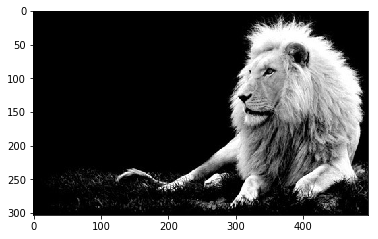

In [8]:
plt.imshow(output, cmap=plt.get_cmap('gray'))

In [9]:
def squash_pixel_value(pixel_value):
    if pixel_value<0:
        return 0
    elif pixel_value<255:
        return pixel_value
    else:
        return 255

In [12]:
def pad_image_array_2d(image_array_2d, kernel_shape, mode='constant'):
    kernel_width = kernel_shape[0]
    kernel_height = kernel_shape[1]
    
    pad_width = 0 if kernel_width==1 else kernel_width-2
    pad_height = 0 if kernel_height==1 else kernel_height-2
    
    return np.pad(image_array_2d, (pad_width, pad_height), mode)

def conv_2d_kernel(image_array_2d, kernel, squash_pixels=True):
    
    padded_image_array = pad_image_array_2d(image_array_2d, kernel.shape)
    
    kernel_width = kernel.shape[0]
    kernel_height = kernel.shape[1]
    
    output = np.zeros(image_array_2d.shape)
    
    for i in range(padded_image_array.shape[0] - kernel_width + 1):
        for j in range(padded_image_array.shape[1] - kernel_height + 1):
            patch_array = padded_image_array[i:i+kernel_width, j:j+kernel_height]
            
            if squash_pixels:
                output[i,j] = squash_pixel_value(np.sum(patch_array*kernel))
            else:
                output[i,j] = np.sum(patch_array*kernel)
                
    return output

In [13]:
'''Edge Detection'''
edge_kernel_1 = np.array([[1,0,-1],
                          [0,0,0],
                          [-1,0,1]])

edge_kernel_2 = np.array([[0,1,0],
                          [1,-4,1],
                          [0,1,0]])

edge_kernel_3 = np.array([[-1,-1,-1],
                          [-1,8,-1],
                          [-1,-1,-1]])

edge_1_output = conv_2d_kernel(lion_array, kernel = edge_kernel_1, squash_pixels = True)
edge_2_output = conv_2d_kernel(lion_array, kernel = edge_kernel_2, squash_pixels = True)
edge_3_output = conv_2d_kernel(lion_array, kernel = edge_kernel_3, squash_pixels = True)

(-0.5, 496.5, 302.5, -0.5)

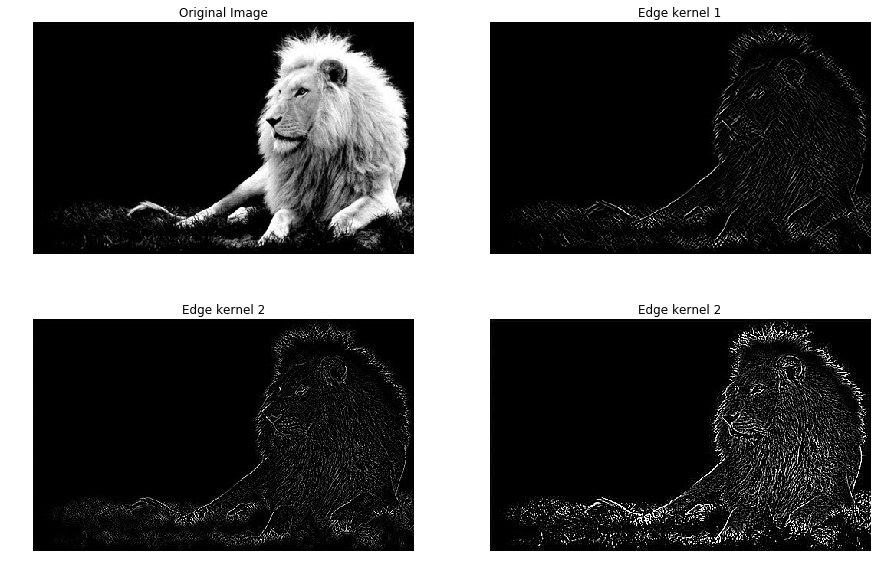

In [15]:
f, ax_array = plt.subplots(2, 2)
f.set_figwidth(15)
f.set_figheight(10)

ax_array[0, 0].imshow(lion_array, cmap=plt.get_cmap('gray'))
ax_array[0, 0].set_title('Original Image')
ax_array[0, 0].axis('off')

ax_array[0, 1].imshow(edge_1_output, cmap=plt.get_cmap('gray'))
ax_array[0, 1].set_title('Edge kernel 1')
ax_array[0, 1].axis('off')

ax_array[1, 0].imshow(edge_2_output, cmap=plt.get_cmap('gray'))
ax_array[1, 0].set_title('Edge kernel 2')
ax_array[1, 0].axis('off')

ax_array[1, 1].imshow(edge_3_output, cmap=plt.get_cmap('gray'))
ax_array[1, 1].set_title('Edge kernel 2')
ax_array[1, 1].axis('off')